### Exercise 2 - Posterior Predictive Checks with Conjugate Priors (Shared-memory)

In a bayesian framework, suppose we observe some data, $\mathbf{x} = {x_1, \ldots, x_n}$, coming from a normal distribution $x_i \sim \mathcal{N} (\mu, \sigma^2)$ with known variance, $\sigma^2$. 
We assume a conjugate prior for the mean, $\mu \sim \mathcal{N} (\mu_0, \sigma_0^2)$ thus the posterior distribution of $\mu$ has closed analytical form:

\begin{align}
p(\mu | \mathcal{\mathbf{x}}, \sigma^2, \mu_0, \sigma_0^2) & \sim \mathcal{N} \left( \frac{1}{\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}} \left( \frac{\mu_0}{\sigma_0^2} + \frac{\sum_i x_i}{\sigma^2} \right) \ ; \ \left(\frac{1}{\sigma_0^2}+\frac{n}{\sigma^2} \right)^{-1} \right) \\
& \sim \mathcal{N}(\mu_n; \sigma_n^2)
\end{align}

We then want to compute some quantity of interest from the posterior predictive distribution:
\begin{align}
p(\tilde{x}| \mathbf{x}) & = \int p(\mathbf{x}|\mu) p(\mu|\mathbf{x}) \\
& = \int \mathcal{N}(\mathbf{x}| \mu, \sigma^2) \mathcal{N} (\mu | \mu_n \sigma_n^2) d \mu \\
& = \mathcal{N} (\mathbf{x}| \mu_n, \sigma_n^2 +\sigma^2)
\end{align}

where $$\mu_n = \sigma_n^2 \left( \frac{\mu_0}{\sigma_0^2} + \frac{\sum_i x_i}{\sigma^2}\right)$$ 

and $$\sigma_n^2 = \frac{1}{\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}}$$.

For example, we want to compute $\mathbb{E}(h(\tilde{x})| \mathbf{x}) = \mathbb{E}[\tilde{x} | \mathbf{x}]$, the average of the posterior predictive checks.


This is a situation where we want to generate many samples from $\tilde{x}$'s to have a distribution of $h(\cdot)$.

In [1]:
import numpy as np
import datetime

#### Simulate some synthetic data as "observed"

In [8]:
mu = 9.2
sigma = 3.9

N = 100000
rng = np.random.RandomState(seed  = 19)

data_X = rng.normal(mu, sigma, N)

#### Set the rest of parameters

In [6]:
mu_0 = 9
sigma_0 = 0.7

### Implementation

In [39]:
# one sample estimate
def posterior_pred_h(data_X, sigma, mu_0, sigma_0, N, rng = np.random.RandomState()):  #location,
    n = len(data_X)
    sigma_n_2 = 1/(n/sigma**2 + 1/sigma_0**2)
    mu_n = sigma_n_2*(mu_0/sigma_0**2 + np.sum(data_X)/sigma**2)
    # sample mu_n from
    mu_n_sampled = rng.normal(mu_n, np.sqrt(sigma_n_2), 1)[0]
    x_tilde = rng.normal(mu_n_sampled, np.sqrt(sigma_n_2+ sigma**2), N)
    # compute function on x_tildes
    h_x = np.mean(x_tilde)
    return mu_n_sampled, h_x

In [40]:
mu_posterior, h_x_tilde =  posterior_pred_h(data_X, mu, sigma, mu_0, sigma_0, 100)

In [41]:
print(mu_posterior)
print(h_x_tilde)

9.189653372492579
9.296976656201924


### How to Parallelise?

This time, we would like to have *shared-memory* for the data, $x$.

```
from parallel.backends import BackendMPI as Backend
backend = Backend()

# Shared-Mem data
Xds = backend.broadcast(observed_X_0)

...

```

## Retrive the estimates

In [47]:
parallel_estimates_mu = np.genfromtxt('estimates_mu_ex2.csv', delimiter=',')
parallel_estimates_hx = np.genfromtxt('estimates_hx_ex2.csv', delimiter=',')

In [49]:
import matplotlib.pyplot as plt

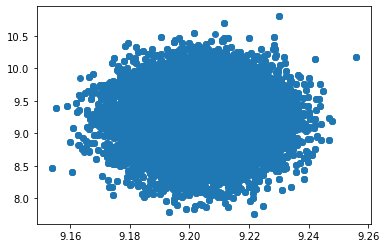

In [51]:
plt.plot(parallel_estimates_mu, parallel_estimates_hx, "o")

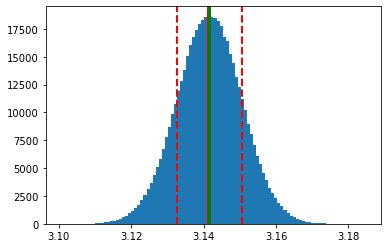

In [ ]:
plt.hist(parallel_estimates, bins = 100);

plt.axvline(np.pi, color = "red", lw = 4)
plt.axvline(np.mean(parallel_estimates), color = "green", lw =3)

plt.axvline(np.mean(parallel_estimates)+ np.sqrt(np.var(parallel_estimates)), linestyle = "dashed", color = "red", lw = 2)
plt.axvline(np.mean(parallel_estimates)-np.sqrt(np.var(parallel_estimates)), linestyle = "dashed", color = "red", lw = 2)


In [ ]:
print(np.mean(parallel_estimates))

print(np.sqrt(np.var(parallel_estimates)))

3.1416007445408516
0.008933194493609908
